<a href="https://colab.research.google.com/github/Sankha1998/machine_learning/blob/master/logistic_regression_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [62]:
iris=sns.load_dataset('iris')

In [63]:
mask1=iris['species']=='versicolor'
mask2=iris['species']=='setosa'

iris=iris[mask1 | mask2][['sepal_length','sepal_width','species']]

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
x=np.linspace(4,8,10)
y=1.5*x-5
y1=0.8*x - 2

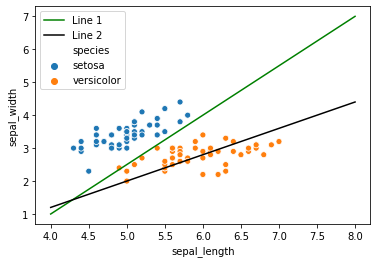

In [66]:
plt.plot(x,y,label='Line 1',color='green')
plt.plot(x,y1,label='Line 2',color='black')
sns.scatterplot(iris['sepal_length'],iris['sepal_width'],hue=iris['species'])

In [67]:
# Prove using Logistic Regression that green line is a better classifier than the black line

# Note : You have to use only the sepal_length and sepal_width cols as inputs

In [68]:
x

array([4.        , 4.44444444, 4.88888889, 5.33333333, 5.77777778,
       6.22222222, 6.66666667, 7.11111111, 7.55555556, 8.        ])

In [69]:
# Line 1 ----> y=1.5*x-5 green 

# Line 2 ----> y1=0.8*x - 2 black

#y=m*x+c
# from the above plot:
                      # y = sepal_width 
                      # x = sepal_length 


In [70]:
df_shape=iris.shape[0]

In [71]:
iris.head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


In [72]:
iris['species'].replace({'setosa':1,'versicolor':-1},inplace=True)

In [73]:
iris

,sepal_length,sepal_width,species
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
95,5.7,3.0,-1
96,5.7,2.9,-1
97,6.2,2.9,-1
98,5.1,2.5,-1


In [97]:
def calcu(wt,b):
  dist=[]
  for i in range(df_shape):
      x = iris['sepal_length'][i]
      y = iris['sepal_width'][i]
      d=abs(wt*x - y + b)/np.sqrt(wt**2 + (-1)**2)
      cheak = (y - wt*x - b) ## y=m*x+c   ---->   y-m*x-c=0
      if cheak>0: ## +ve distance
        d=d
      else:  ## -ve distance
        d=(-1)*d
      if iris['species'][i] == 1:
        dist.append(d)
      else:
        dist.append(-d)
  return sum(dist)

In [98]:
#for Line 1 ----> y=1.5*x-5 green 
wt=1.5
b=-5
calcu(wt,b)

56.939975142519756

In [99]:
# for  Line 2 ----> y1=0.8*x - 2 black
wt=0.8
b=-2
calcu(wt,b)

54.738903541956425

In [100]:
## Conclusion : 
#Green line : 56.94
#Black line : 54.74
##so, Green line is better for splitting 